#Resolutions vs Eta

In [1]:
# This will force external files to be reloaded
%load_ext autoreload
%autoreload 2
import utils.rootprint
import utils.rootnotes
from array import array

from utils.plotting import *

from ROOT import TFile, TH1F, TCanvas, TLegend, TGraphErrors, gStyle, gDirectory
import math
from itertools import chain
gStyle.SetOptStat(000000)

In [2]:
constants_dir = "/Users/demattia/RemoteProjects/LinearizedTrackFit/LinearizedTrackFit/python/ConstantsProduction/"

# regions_name = "FourteenRegions"
regions_name = "NineRegions"

# Flat pT
# fit_dir = constants_dir+regions_name+"/FlatPt/LTF_FullCorrections_"
# fit_dir = constants_dir+regions_name+"/FlatPt/LTF_FullCorrections_flatPtTgTheta_"
fit_dir = constants_dir+regions_name+"/FlatPt/LTF_FullCorrections_flatPtTgThetaAndPtPreEstimate_"

# Flat 1/pT
# fit_dir = constants_dir+regions_name+"/FlatOneOverPt/LTF_FullCorrections_"
# fit_dir = constants_dir+regions_name+"/FlatOneOverPt/LTF_FullCorrections_flatPtTgTheta_"
# fit_dir = constants_dir+regions_name+"/FlatOneOverPt/LTF_FullCorrections_flatPtTgThetaAndPtPreEstimate_"


# 6/6 only
input_file_name_low = fit_dir+"2_5"+"/fullLinearFitterHistograms.root"
input_file_name_mid = fit_dir+"5_15"+"/fullLinearFitterHistograms.root"
input_file_name_high = fit_dir+"15_more"+"/fullLinearFitterHistograms.root"

## $\chi^2/ndof$

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c_chi2Ndof
TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c_chi2Ndof


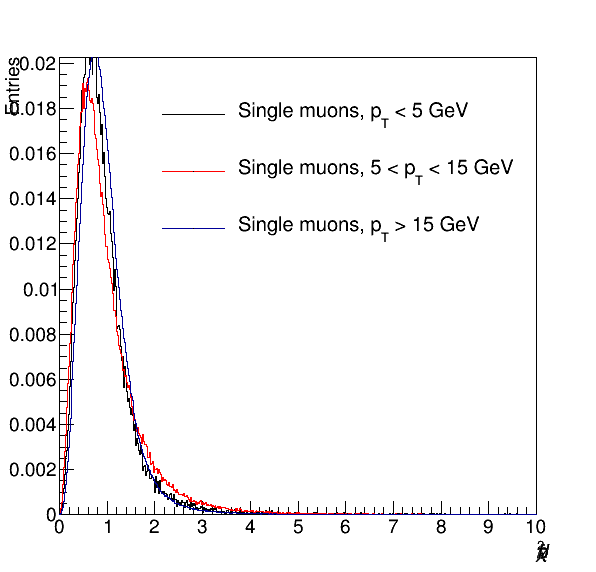

In [3]:
c_chi2Ndof_low = draw_chi2ndof(input_file_name_low)
c_chi2Ndof_mid = draw_chi2ndof(input_file_name_mid)
c_chi2Ndof_high = draw_chi2ndof(input_file_name_high)

c = TCanvas("chi2", "chi2", 600, 600)
h = c_chi2Ndof_mid[1].DrawNormalized()
h = c_chi2Ndof_low[1].DrawNormalized("same")
c_chi2Ndof_low[1].SetLineColor(1)
h.SetLineColor(1)
h = c_chi2Ndof_mid[1].DrawNormalized("same")
h.SetLineColor(2)
c_chi2Ndof_mid[1].SetLineColor(2)
c_chi2Ndof_high[1].DrawNormalized("same")

l = TLegend(0.25,0.55,0.85,0.85)
l.AddEntry(c_chi2Ndof_low[1],"Single muons, p_{T} < 5 GeV","pl")
l.AddEntry(c_chi2Ndof_mid[1],"Single muons, 5 < p_{T} < 15 GeV","pl")
l.AddEntry(c_chi2Ndof_high[1],"Single muons, p_{T} > 15 GeV","pl")
l.SetBorderSize(0)
l.Draw()

c

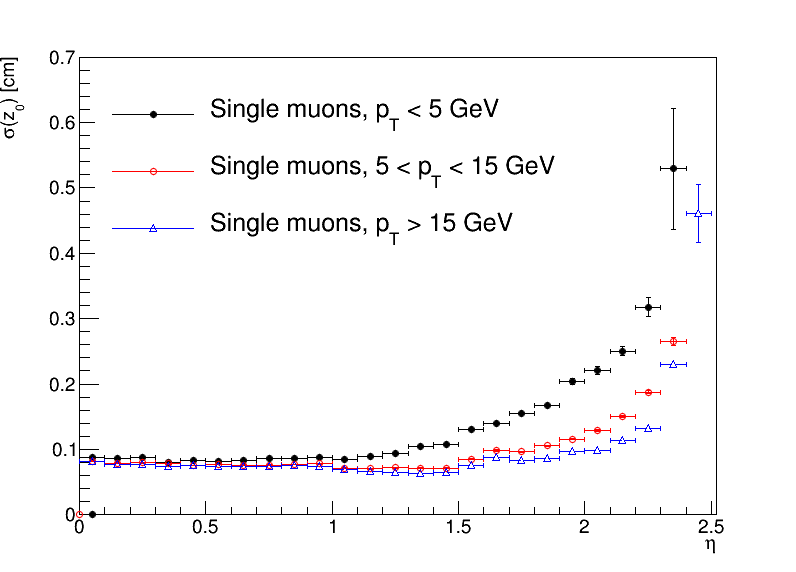

In [4]:
file_name_list = [input_file_name_low,
                  input_file_name_mid,
                  input_file_name_high]
legend_entry_list = ["Single muons, p_{T} < 5 GeV",
                     "Single muons, 5 < p_{T} < 15 GeV",
                     "Single muons, p_{T} > 15 GeV"]

c = draw_slices_overlay(file_name_list, legend_entry_list,
                        "deltaZ0VsEta", "#sigma(z_{0}) [cm]", 0.7, 500)
c[0]

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c


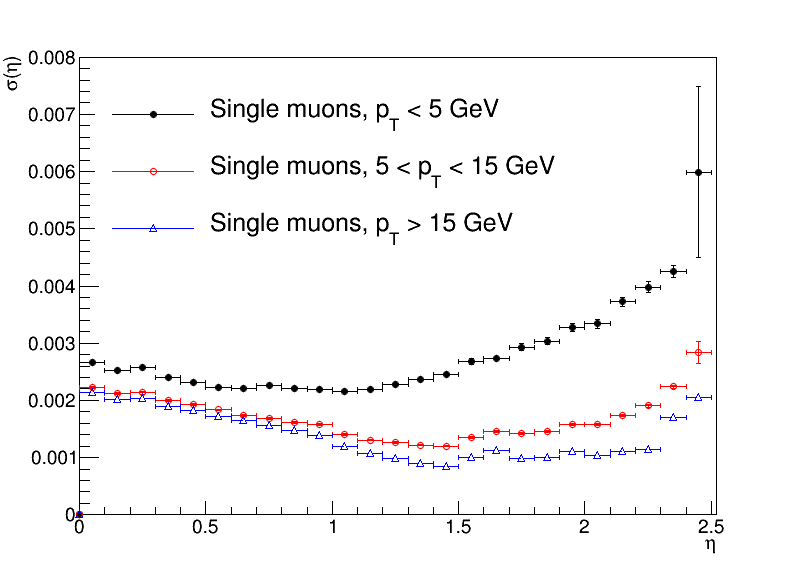

In [5]:
c = draw_slices_overlay(file_name_list, legend_entry_list, "deltaEtaVsEta", "#sigma(#eta)", 0.008, 400)
c[0]

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c


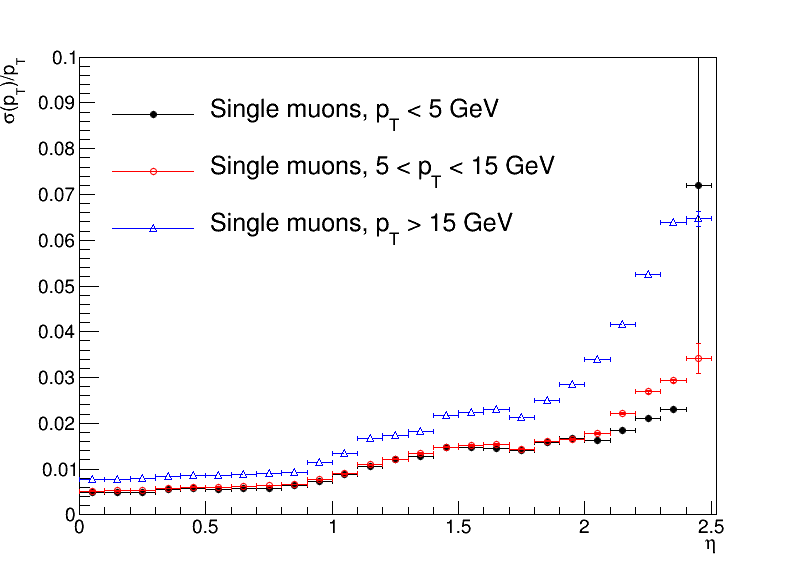

In [6]:
c = draw_slices_overlay(file_name_list, legend_entry_list, "deltaPtOverPtVsEta", "#sigma(p_{T})/p_{T}", 0.1, 500, 10)
c[0]
# c[0].SaveAs("PtRelativeResolution_flatPt.pdf")

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c


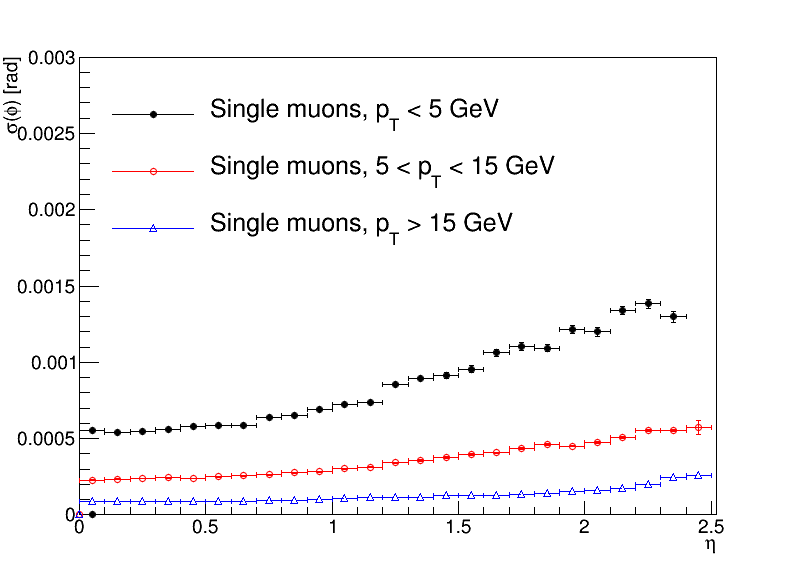

In [7]:
c = draw_slices_overlay(file_name_list, legend_entry_list,
                 "deltaPhiVsEta", "#sigma(#phi) [rad]", 0.003, 500)
c[0]

In [8]:
def compute_nums_transverse(x):
    var_means = x
    pre_pt_average = 1
    pre_pt = x + pre_pt_average
    par_means = 3
    matrix = x*x
    mean_R = 6
    total = var_means + pre_pt + mean_R + var_means + 2*(matrix + par_means)
    return total


def compute_nums_longitudinal(x):
    var_means = x
    pre_cottheta_average = 1
    pre_cottheta = x + pre_cottheta_average
    y = x/2
    par_means = 2
    matrix = y*y
    mean_R = 6
    total = var_means + pre_cottheta + mean_R + var_means/2 + matrix + par_means
    return total


transverse = compute_nums_transverse(6) + 6*compute_nums_transverse(5)
longitudinal = compute_nums_longitudinal(12) + 6*compute_nums_longitudinal(10)

# longitudinal = compute_nums(12) + 6*compute_nums(10)

transverse + longitudinal

# 5*(transverse + longitudinal)

1000

In [9]:
bit_list = [0]*32
layers_list = [5, 6, 7, 8, 9, 10]
radius_list = [0.]*6

for l, r in zip(layers_list, radius_list):
    bit_list[l] = 1
    if r > 61:
        bit_list[l+10] = 1

out = 0
for bit in reversed(bit_list):
    out = (out << 1) | bit
print out

2016


TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c


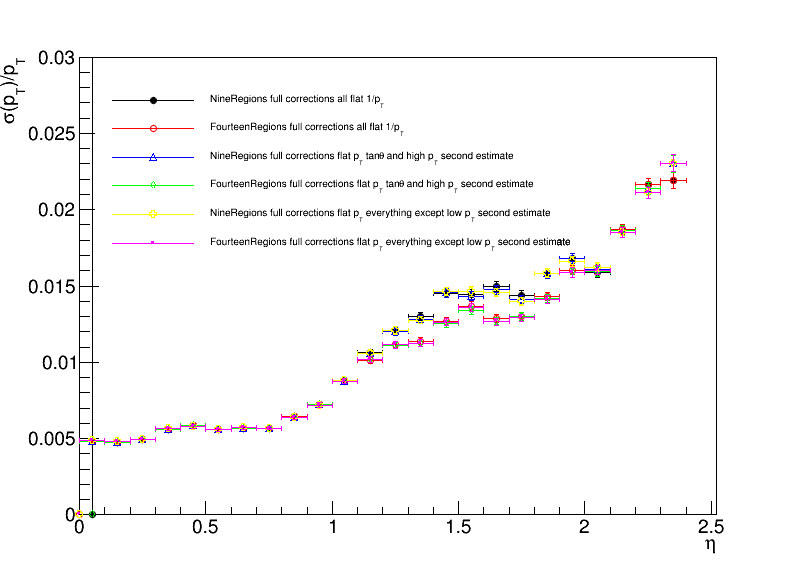

In [10]:
pT_range = "2_5"
# pT_range = "5_15"
# pT_range = "15_more"


applied_on = "FlatPt"

def fill_list():
    suffixes = [["", "all flat 1/p_{T}"],
                ["flatPtTgTheta_", "flat p_{T} tan#theta and high p_{T} second estimate"],
                ["flatPtTgThetaAndPtPreEstimate_", "flat p_{T} everything except low p_{T} second estimate"]]
    file_name_list = []
    legend_entry_list = []
    for suffix in suffixes:
        for regions_name in ["NineRegions", "FourteenRegions"]:
            fit_dir = constants_dir+regions_name+"/"+applied_on+"/LTF_FullCorrections_"+suffix[0]
            input_file_name = fit_dir+pT_range+"/fullLinearFitterHistograms.root"
            file_name_list.append(input_file_name)
            legend_entry_list.append(regions_name+" full corrections "+suffix[1])
    return file_name_list, legend_entry_list

file_name_list, legend_entry_list = fill_list()

c = draw_slices_overlay(file_name_list, legend_entry_list, "deltaPtOverPtVsEta", "#sigma(p_{T})/p_{T}", 0.03, 500, 10)
c[0]

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c


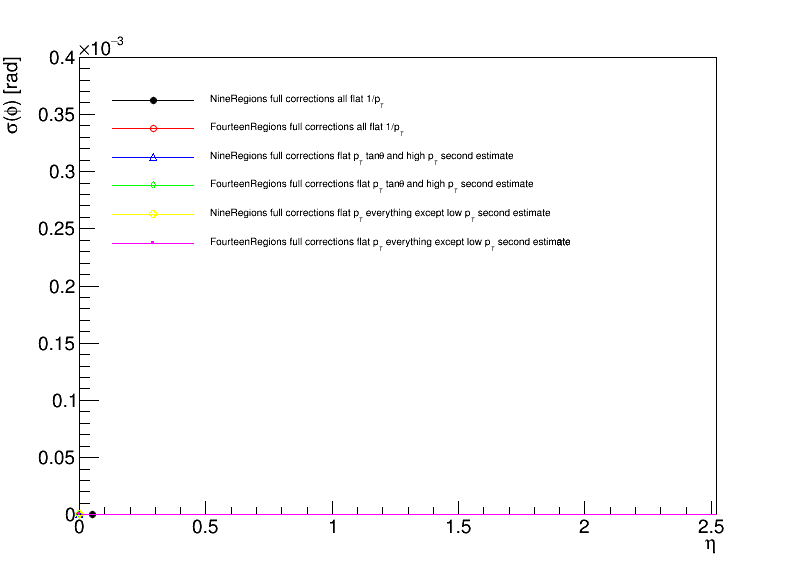

In [11]:
c = draw_slices_overlay(file_name_list, legend_entry_list, "deltaPhiVsEta", "#sigma(#phi) [rad]", 0.0004, 500, 10)
c[0]

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c


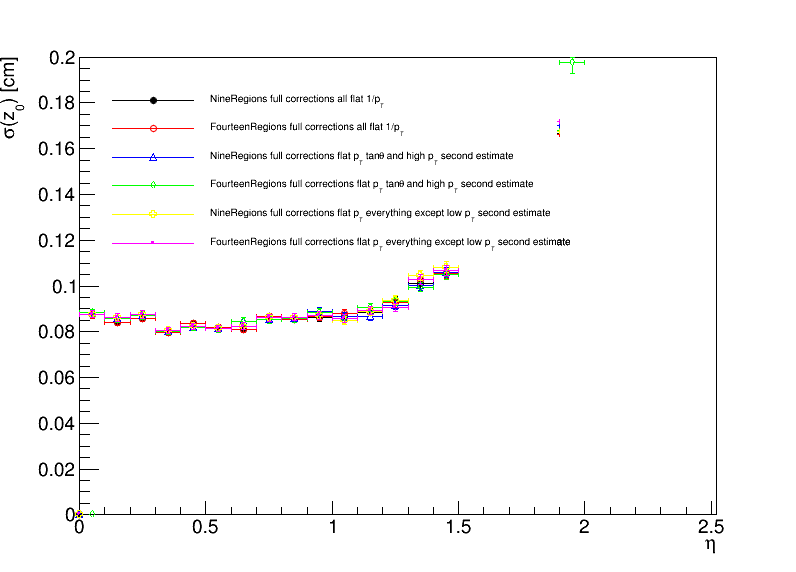

In [12]:
c = draw_slices_overlay(file_name_list, legend_entry_list,
                        "deltaZ0VsEta", "#sigma(z_{0}) [cm]", 0.2, 500)
c[0]

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c


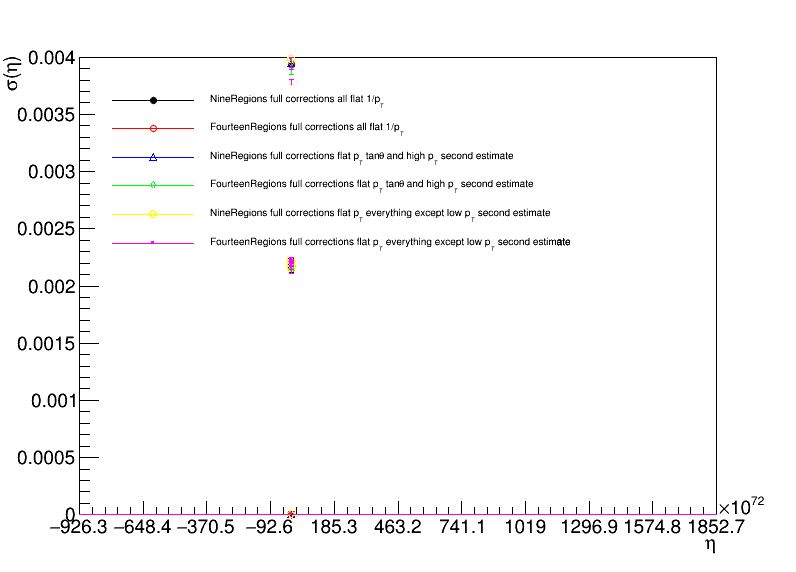

In [13]:
c = draw_slices_overlay(file_name_list, legend_entry_list, "deltaEtaVsEta", "#sigma(#eta)", 0.004, 400)
c[0]

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c_chi2Ndof
TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c_chi2Ndof
TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c_chi2Ndof
TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c_chi2Ndof
TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c_chi2Ndof
TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c_chi2Ndof
TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: chi2


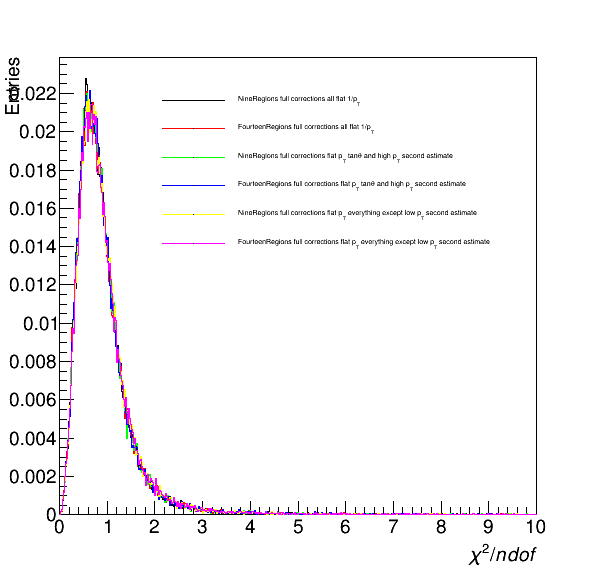

In [14]:
chi2Ndof = []
for file_name, legend_entry in zip(file_name_list, legend_entry_list):
    chi2Ndof.append(draw_chi2ndof(file_name))

c = TCanvas("chi2", "chi2", 600, 600)
l = TLegend(0.25,0.55,0.85,0.85)
for i in range(len(chi2Ndof)):
    h = chi2Ndof[i][1].DrawNormalized("same")
    h.SetLineColor(i+1)
    chi2Ndof[i][1].SetLineColor(i+1)
    l.AddEntry(chi2Ndof[i][1],legend_entry_list[i],"pl")
l.SetBorderSize(0)
l.Draw()
c

In [15]:
input_file_name_1 = base_dir+"fullLinearFitterHistograms_sixOutOfSix_fullEta_pT_15_Extrapolated.root"
input_file = TFile(input_file_name_5, "READ")
h = input_file.FindObjectAny("deltaPtOverPtVsEta")
c = TCanvas()
h.RebinX(10)
h.FitSlicesY()
h2_1 = gDirectory.Get("deltaPtOverPtVsEta_2");
h2_1.GetXaxis().SetRangeUser(0, 2.5)
h2_1.GetYaxis().SetRangeUser(0, 0.1)
h2_1.Draw()
c

NameError: name 'base_dir' is not defined

$$\Delta\phi \simeq \mbox{pitch}\cdot(\mbox{strip_index} - \mbox{central_index})\cdot(R_{extrapolated} - R)\cdot\frac{1}{R^2}$$

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c


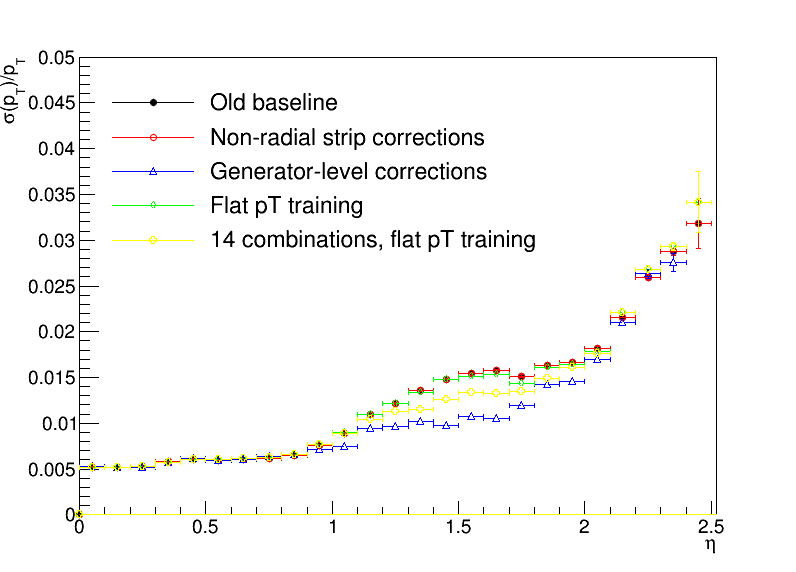

In [16]:
base_name = "/Users/demattia/RemoteProjects/Test/FlatPt/fullLinearFitterHistograms_sixOutOfSix_"
file_name_list = []
legend_entry_list = []

# pt_range = "15_more"
# pt_range = "2_5"
pt_range = "5_15"

# Baseline
# file_name_list.append(base_name+"BASELINE_fullEta_flatPt_pT_"+pt_range.rstrip("_more")+".root")
file_name_list.append(constants_dir+"NineRegions/FlatPt/LTF_OldBaseline_"+pt_range+"/fullLinearFitterHistograms.root")
# file_name_list.append("/Users/demattia/RemoteProjects/Test/")
# legend_entry_list.append("Old baseline (9 combinations)")
legend_entry_list.append("Old baseline")
# Non-radial strip corrections
# file_name_list.append(base_name+"nonRadialStripCorrection_fullEta_flatPt_pT_15.root")
# legend_entry_list.append("Non-radial strip corrections (9 combinations)")
# legend_entry_list.append("Non-radial strip corrections")
# Non-radial strip corrections
fit_dir = constants_dir+"NineRegions/FlatPt/LTF_FullCorrections_"
input_file_name_high_9 = fit_dir+pt_range+"/fullLinearFitterHistograms.root"
file_name_list.append(input_file_name_high_9)
legend_entry_list.append("Non-radial strip corrections")

# MC-truth corrections
file_name_list.append(base_name+"GEN_fullEta_flatPt_pT_"+pt_range.rstrip("_more")+".root")
# legend_entry_list.append("Generator-level corrections (9 combinations), flat 1/pT training")
legend_entry_list.append("Generator-level corrections")

# 9 regions, flat pT training
fit_dir = constants_dir+"NineRegions/FlatPt/LTF_FullCorrections_flatPtTgThetaAndPtPreEstimate_"
input_file_name_high_9 = fit_dir+pt_range+"/fullLinearFitterHistograms.root"
file_name_list.append(input_file_name_high_9)
# legend_entry_list.append("9 combinations flat pT training")
legend_entry_list.append("Flat pT training")

# 14 regions, flat pT training
fit_dir = constants_dir+"FourteenRegions/FlatPt/LTF_FullCorrections_flatPtTgThetaAndPtPreEstimate_"
input_file_name_high_14 = fit_dir+pt_range+"/fullLinearFitterHistograms.root"
file_name_list.append(input_file_name_high_14)
legend_entry_list.append("14 combinations, flat pT training")



c = draw_slices_overlay(file_name_list, legend_entry_list, "deltaPtOverPtVsEta", "#sigma(p_{T})/p_{T}", 0.05, 500, 10)
c[0]